# Tesla Stock Prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Tesla.csv")

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [5]:
df.set_index('Date', inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1692 entries, 6/29/2010 to 3/17/2017
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1692 non-null   float64
 1   High       1692 non-null   float64
 2   Low        1692 non-null   float64
 3   Close      1692 non-null   float64
 4   Volume     1692 non-null   int64  
 5   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 92.5+ KB


In [7]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [8]:
temp=df[df.duplicated()]
temp

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,


In [9]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [10]:
df.std()

Open         9.430992e+01
High         9.569491e+01
Low          9.285523e+01
Close        9.431319e+01
Volume       4.295971e+06
Adj Close    9.431319e+01
dtype: float64

In [11]:
df.var()

Open         8.894362e+03
High         9.157517e+03
Low          8.622093e+03
Close        8.894977e+03
Volume       1.845537e+13
Adj Close    8.894977e+03
dtype: float64

In [12]:
df.corr()

,Open,High,Low,Close,Volume,Adj Close
Open,1.000000,0.999623,0.999605,0.999233,0.407515,0.999233
High,0.999623,1.000000,0.999521,0.999691,0.416466,0.999691
Low,0.999605,0.999521,1.000000,0.999656,0.397615,0.999656
Close,0.999233,0.999691,0.999656,1.000000,0.406907,1.000000
Volume,0.407515,0.416466,0.397615,0.406907,1.000000,0.406907
Adj Close,0.999233,0.999691,0.999656,1.000000,0.406907,1.000000


<AxesSubplot:>

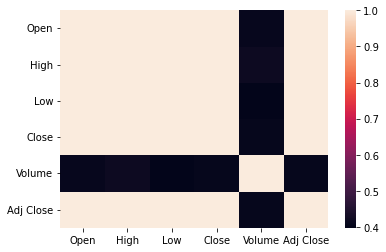

In [13]:
sns.heatmap(df.corr())

<Figure size 720x576 with 0 Axes>

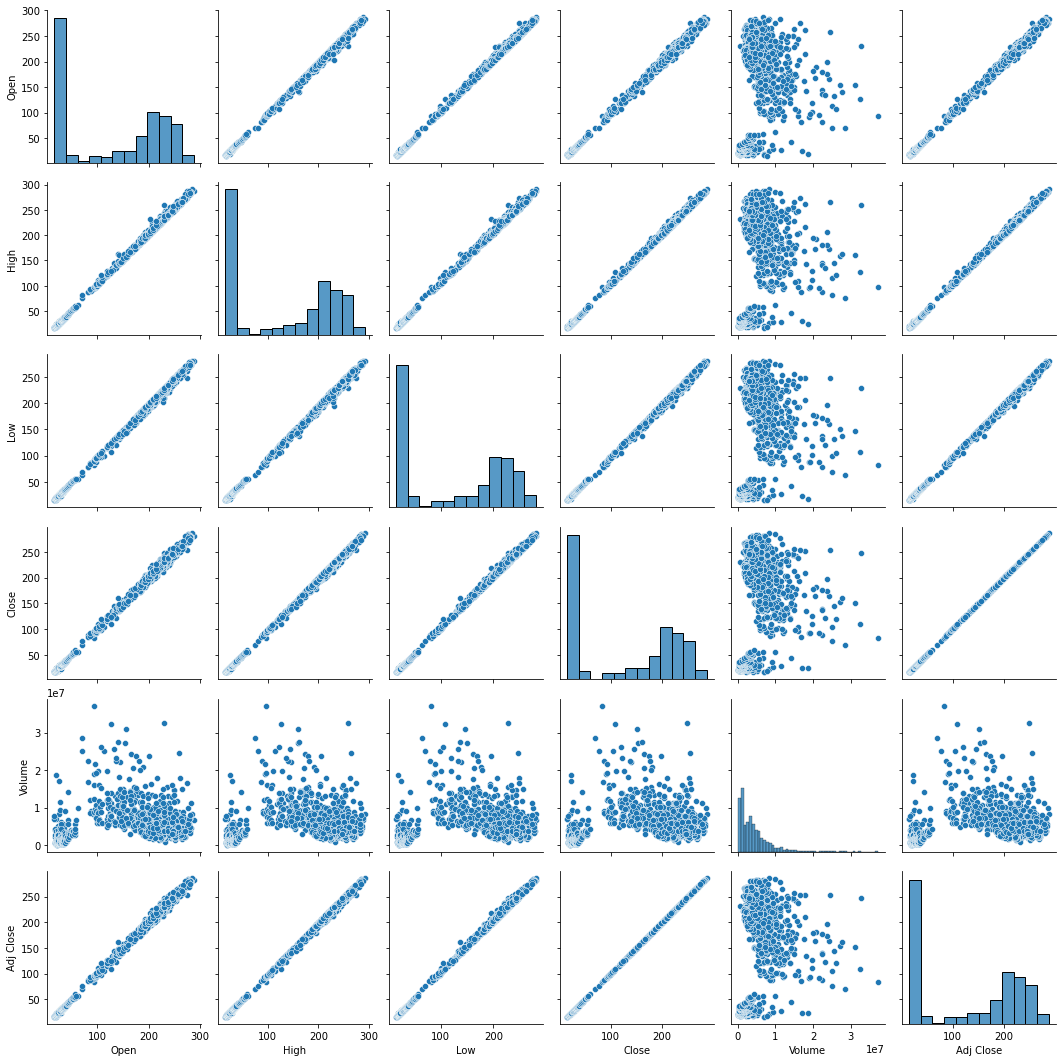

In [14]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df)

C:\Users\sivar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Open'>

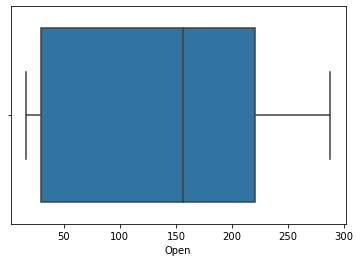

In [15]:
sns.boxplot(df['Open'])


C:\Users\sivar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Close'>

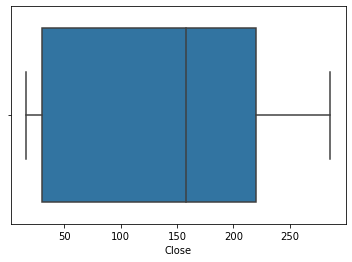

In [16]:
sns.boxplot(df['Close'])

C:\Users\sivar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='High'>

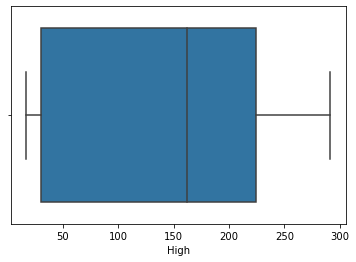

In [17]:
sns.boxplot(df['High'])

C:\Users\sivar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Low'>

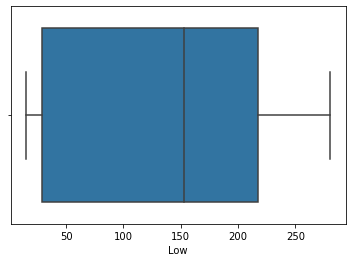

In [18]:
sns.boxplot(df['Low'])

<AxesSubplot:xlabel='Date', ylabel='High'>

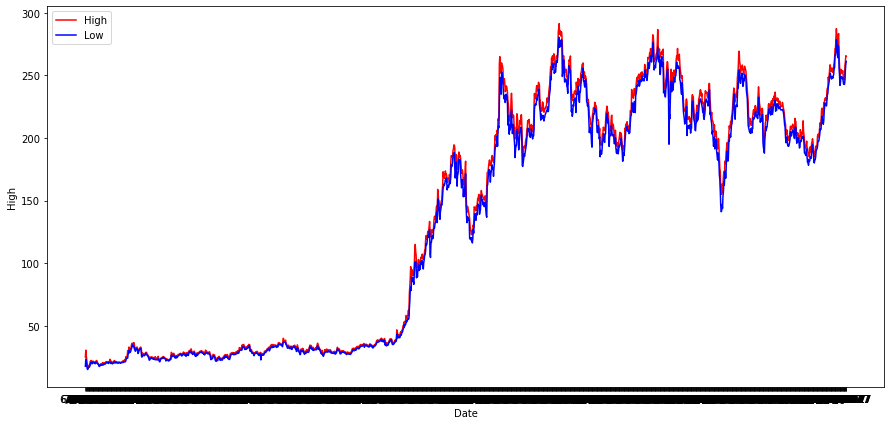

In [19]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=df,x="Date",y="High",color="red",label="High")
sns.lineplot(data=df,x="Date",y="Low",color="blue",label="Low")

<BarContainer object of 1528 artists>

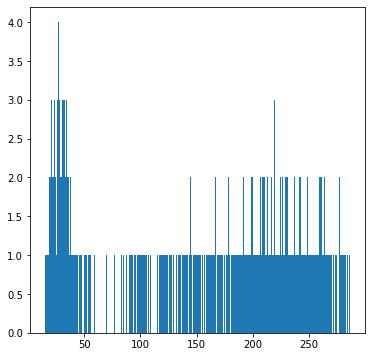

In [20]:
plt.figure(figsize=(6,6))
plt.bar(df['Adj Close'].value_counts().keys(), df['Adj Close'].value_counts())

In [ ]:
from sklearn.model_selection import train_test_split

In [46]:
X = df[['Open','High','Low','Volume']]
y = df['Close']

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2,random_state=23)

In [48]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((1353, 4), (339, 4), (1353,), (339,))

In [49]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [69]:
y_predicted=lm.predict(X_train)
y_predicted_train=y_predicted

In [70]:
y_predicted=lm.predict(X_test)
y_predicted_test=y_predicted
type(y_predicted_test)

numpy.ndarray

In [71]:
lm.score(X_train,y_predicted_train)

1.0

In [72]:
lm.score(X_test,y_predicted_test)

1.0

In [73]:
from sklearn.metrics import mean_squared_error as mse

In [74]:
R2_train = round(lm.score(X_train,y_predicted_train),3)
print("The R2 value of the Training Set is : {}".format(R2_train))

The R2 value of the Training Set is : 1.0


In [75]:
y_predicted=lm.predict(X_test)

In [76]:
R2_test= round(lm.score(X_test,y_predicted_test),3)
print("The R2 value of the Testing Set is : {}".format(R2_test))

The R2 value of the Testing Set is : 1.0


In [77]:
import pickle
pickle.dump(lm, open('tesla_stock_prediction1.pkl', 'wb'))

In [83]:
import pickle

def stock_prediction1(features):
    
    pickled_model = pickle.load(open('tesla_stock_prediction1.pkl', 'rb'))
    stock_price = str(round(list(pickled_model.predict([features]))[0]))
     #house_price = str(round(list(pickled_model.predict([features]))[0]))
    
    return str("stock price may be "  + stock_price)

In [84]:
import random
test_features  = list(X_test.iloc[random.randint(0,340),:])

In [85]:
stock_prediction1(test_features)

C:\Users\sivar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


'stock price may be 231'

In [86]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
scaled.fit(df)
scaled_data = scaled.transform(df)

In [87]:
scaled_data = pd.DataFrame(scaled_data,columns=df.columns.values)
scaled_data

,Open,High,Low,Close,Volume,Adj Close
0,-1.203215,-1.147419,-1.211450,-1.151173,3.375219,-1.151173
1,-1.131197,-1.090764,-1.149400,-1.151809,3.007510,-1.151809
2,-1.139576,-1.137802,-1.182041,-1.171642,0.919286,-1.171642
3,-1.160789,-1.167280,-1.198846,-1.200915,0.202356,-1.200915
4,-1.192608,-1.199684,-1.229871,-1.233688,0.604503,-1.233688
...,...,...,...,...,...,...
1687,1.191939,1.171572,1.214979,1.206353,-0.293394,1.206353
1688,1.205621,1.289376,1.249882,1.331823,0.769497,1.331823
1689,1.321126,1.319481,1.338756,1.307747,0.127101,1.307747
1690,1.378400,1.369133,1.390357,1.374778,0.658872,1.374778


# Model Building

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X = scaled_data[['Open','High','Low','Volume']]
y = scaled_data['Close']

In [90]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2,random_state=23)

In [91]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((1353, 4), (339, 4), (1353,), (339,))

In [92]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [93]:
y_predicted=lm.predict(X_train)
y_predicted_train=y_predicted.reshape(1,-1)

In [94]:
y_predicted=lm.predict(X_test)
y_predicted_test=y_predicted.reshape(1,-1)

In [95]:
lm.score(X_train,y_train)

0.9997668823187055

In [96]:
lm.score(X_test,y_test)

0.9996798725399185

In [97]:
from sklearn.metrics import mean_squared_error as mse

In [98]:
R2_train = round(lm.score(X_train,y_train),3)
print("The R2 value of the Training Set is : {}".format(R2_train))

The R2 value of the Training Set is : 1.0


In [99]:
y_predicted=lm.predict(X_test)

In [100]:
R2_test= round(lm.score(X_test,y_test),3)
print("The R2 value of the Testing Set is : {}".format(R2_test))

The R2 value of the Testing Set is : 1.0


In [101]:
import pickle
pickle.dump(lm, open('tesla_stock_prediction.pkl', 'wb'))

In [102]:
import pickle

def stock_prediction(features):
    
    pickled_model = pickle.load(open('tesla_stock_prediction.pkl', 'rb'))
    stock_price = str(round(list(pickled_model.predict([features]))[0]))
    
    return str("stock price may be "  + stock_price)

In [103]:
import random
test_features  = list(X_test.iloc[random.randint(0,300),:])

In [104]:
stock_prediction(test_features)

C:\Users\sivar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


'stock price may be -1'